## 1. Data exploration

The data is based on:

- __4264__ observations
- __5__ features 
- __12__ distinct users

Features:

 - __user__: user id
 - __rate_blink_left__: percentage the user blinked left eye (0.0 until 1.0)
 - __rate_blink_right__: percentage the user blinked right eye (0.0 a 1.0)
 - __rate_smile_or_not__: percentage the user smile (0.0 a 1.0)
 
Target:

 - __feel__: emotion (0-sad | 1-angry | 2-happy)

### Get started

In [2]:
# Include the predict server path to access data and scripts
import os,sys
parentdir = os.path.dirname("../server/")
sys.path.append(parentdir)

# Imports to execute the analisys
from data import get_full_data, get_training, get_predict
from matplotlib import pyplot as plt
from sklearn import linear_model
from predicting import accuracy_score, performance_metric, real_world, plot_learning_curve
import pandas as pd
import numpy as np

# Allows the use of display() for DataFrames
from IPython.display import display 

# Import supplementary visualizations code visuals.py
import visuals as vs

# Get X (Features) and Y (Target)
# features (rate_blink_left, rate_blink_right, rate_smile_or_not)
# target (0 - sad, 1 - angry, 2 - happy)
X, Y, df = get_full_data()

# Print the first few entries
display(X.head(25))

,rate_blink_left,rate_blink_right,rate_smile_or_not
0,0.99,0.51,0.01
1,0.99,0.79,0.01
2,0.99,0.79,0.01
3,0.99,0.79,0.01
4,0.99,0.79,0.01
5,0.99,0.79,0.01
6,0.99,0.79,0.01
7,0.81,0.76,0.01
8,0.81,0.76,0.01
9,0.81,0.76,0.01


## Investigate data exploration

We will to compute the following:

- The total number of expressions, n_expressions.
- The total number of features for each expression, n_features.

In [3]:
# Calculate number of features
n_features = len(df.columns) - 1 # 1 minus target label 

# Selecting sad expressions
df_sad = df[df['feel'] == 0]
# Selecting angry expressions
df_angry = df[df['feel'] == 1]
# Selecting happy expressions
df_happy = df[df['feel'] == 2]

# Calculate number of expressions
n_expressions = len(df.index)
n_sad_expressions = len(df_sad)
n_angry_expressions = len(df_angry)
n_happy_expressions = len(df_happy)

# Print the results
print "Number of features: {}".format(n_features)
print "Total number of sad expressions: {}".format(n_sad_expressions)
print "Total number of angry expressions: {}".format(n_angry_expressions)
print "Total number of happy expressions: {}".format(n_happy_expressions)
print "Total number of expressions: {}".format(n_expressions)

Number of features: 4
Total number of sad expressions: 1382
Total number of angry expressions: 1441
Total number of happy expressions: 1441
Total number of expressions: 4264


### Create a function to analysing

We will see the ocorrency of 3 features

In [5]:
# Representation examples
# Good references about data analisys
#http://felipegalvao.com.br/blog/2016/03/08/visualizacao-de-dados-com-python-matplotlib/
# Another links
# http://www.dummies.com/programming/big-data/data-science/how-to-visualize-the-classifier-in-an-svm-supervised-learning-model/
# http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py
# http://scikit-learn.org/stable/auto_examples/plot_multilabel.html#sphx-glr-auto-examples-plot-multilabel-py
#http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py
def display_features(X, Y):
    from collections import Counter
    
    fig, eixos = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
    
    # Dados do grafico de piscadas do olho esquerdo aberto
    y_axis = X['rate_blink_left'].copy()
    x_axis = range(len(y_axis))
    width_n = 0.5
    bar_color = 'orange'
    y_axis.fillna(y_axis.mean(), inplace=True)
    eixos[0].set_xlabel('Probabilidade (rate_blink_left)')
    eixos[0].set_ylabel('Ocorrencia')
    eixos[0].hist(y_axis, bins=15, color=bar_color)
    eixos[0].set_title('Probabilidade do olho esquerdo aberto')
    
    # Dados do grafico de piscadas do olho direito aberto
    y_axis = X['rate_blink_right'].copy()
    x_axis = range(len(y_axis))
    width_n = 0.5
    bar_color = 'red'
    y_axis.fillna(y_axis.mean(), inplace=True)
    eixos[1].set_xlabel('Probabilidade (rate_blink_right)')
    eixos[1].set_ylabel('Ocorrencia')
    eixos[1].hist(y_axis, bins=15, color=bar_color)
    eixos[1].set_title('Probabilidade do olho direito aberto')
    
    # Dados do grafico de estar sorrindo
    y_axis = X['rate_smile_or_not'].copy()
    x_axis = range(len(y_axis))
    width_n = 0.5
    bar_color = 'blue'
    y_axis.fillna(y_axis.mean(), inplace=True)
    eixos[2].set_xlabel('Probabilidade (rate_smile_or_not)')
    eixos[2].set_ylabel('Ocorrencia')
    eixos[2].hist(y_axis, bins=15, color=bar_color)
    eixos[2].set_title('Probabilidade de sorriso')
    
    # Ajusta o espaço entre os dois gráficos
    plt.subplots_adjust(wspace=.5)
    plt.show()

###  Feature Observation

We are see the 3 features in dataset

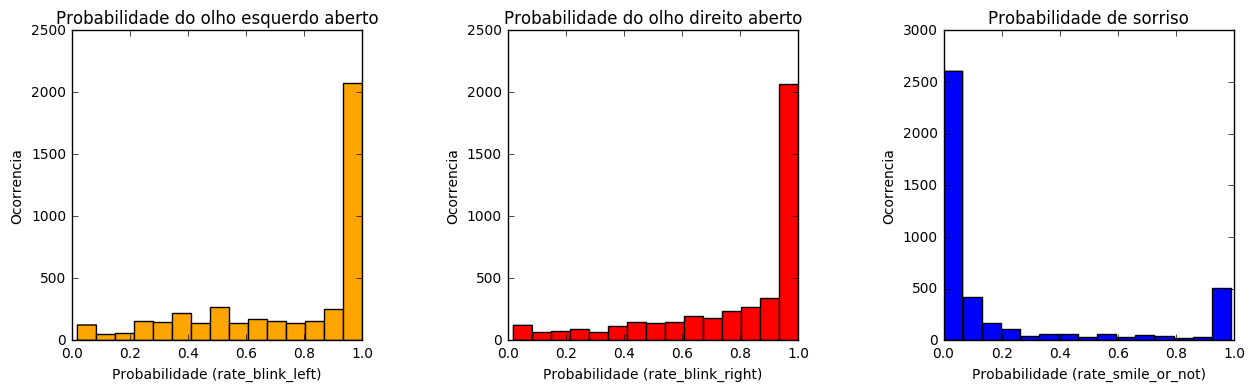

In [6]:
display_features(X, Y)

### Expression distribution 

Corr Sad: 0.08
Corr Angry: -0.01
Corr Happy: -0.25


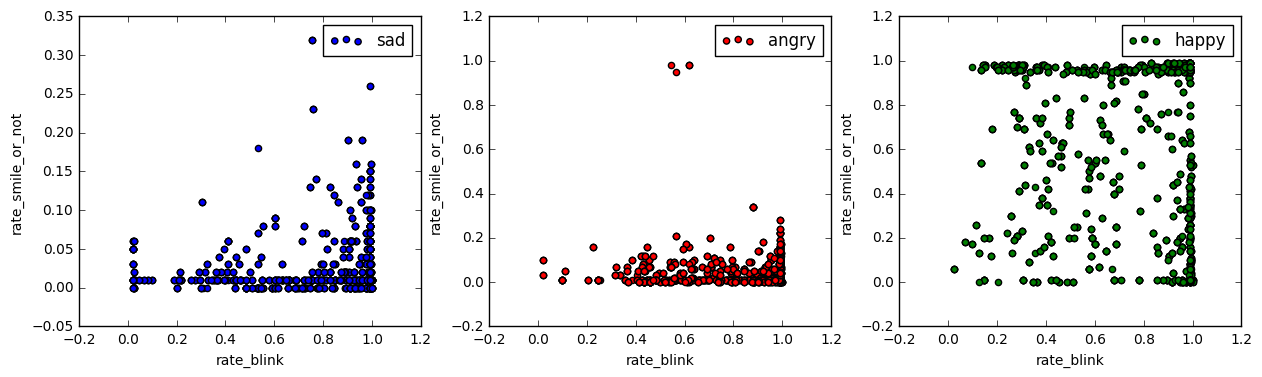

In [11]:
df_sad.loc[:, 'rate_blink'] = df_sad.apply(lambda x: (x['rate_blink_left'] + x['rate_blink_right'] ) / 2, axis=1)
df_angry.loc[:, 'rate_blink'] = df_angry.apply(lambda x : (x['rate_blink_left'] + x['rate_blink_right'] ) / 2, axis=1)
df_happy.loc[:, 'rate_blink'] = df_happy.apply(lambda x : (x['rate_blink_left'] + x['rate_blink_right'] ) / 2, axis=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

df_sad.plot.scatter(x='rate_blink', y='rate_smile_or_not', color='b', label='sad', ax=ax[0])
df_angry.plot.scatter(x='rate_blink', y='rate_smile_or_not', color='r', label='angry', ax=ax[1])
df_happy.plot.scatter(x='rate_blink', y='rate_smile_or_not', color='g', label='happy', ax=ax[2])

cor_sad = df_sad[['rate_blink', 'rate_smile_or_not']].corr(method='pearson').values[0][1]
cor_angry = df_angry[['rate_blink', 'rate_smile_or_not']].corr(method='pearson').values[0][1]
cor_happy = df_happy[['rate_blink', 'rate_smile_or_not']].corr(method='pearson').values[0][1]

print("Corr Sad: {:.2f}".format(cor_sad))
print("Corr Angry: {:.2f}".format(cor_angry))
print("Corr Happy: {:.2f}".format(cor_happy))

### Data pre-processing

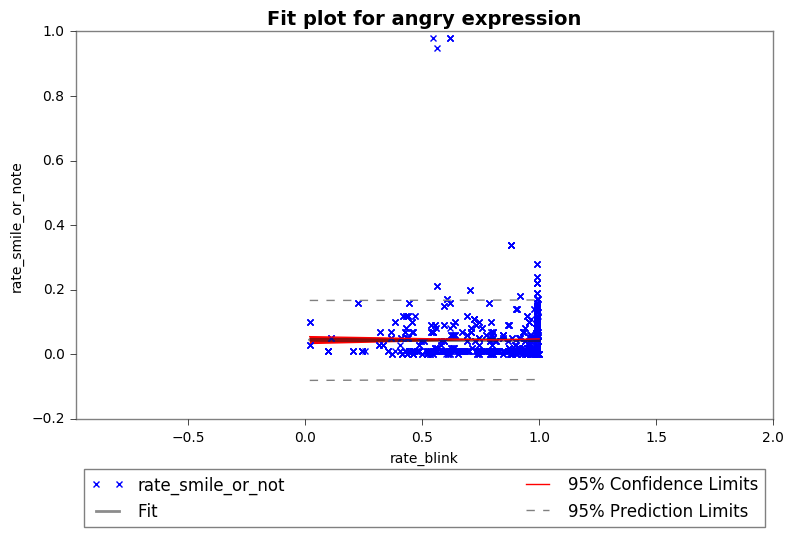

In [68]:
import scipy.stats as stats

def outlier_by_corr_and_ci(df, name):
    x = df['rate_blink'].copy()
    y = df['rate_smile_or_not'].copy()

    # Modeling with Numpy
    p, cov = np.polyfit(x,y,1,cov=True)           # parameters and covariance from of the fit
    y_model = np.polyval(p, x)                    # model using the fit parameters; NOTE: parameters here are coefficients

    # Statistics
    n = x.size                                    # number of observations
    m = p.size                                    # number of parameters
    DF = n - m                                    # degrees of freedom
    t = stats.t.ppf(0.95, n - m)                  # used for CI and PI bands

    # Estimates of Error in Data/Model
    resid = y - y_model                           
    chi2 = np.sum((resid/y_model)**2)             # chi-squared; estimates error in data
    chi2_red = chi2/(DF)                          # reduced chi-squared; measures goodness of fit
    s_err = np.sqrt(np.sum(resid**2)/(DF))        # standard deviation of the error


    # Plotting --------------------------------------------------------------------
    fig, ax = plt.subplots(figsize=(9,5))

    # Data
    ax.plot(x,y,'x', color='r', markersize=5, markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')

    # Fit
    ax.plot(x,y_model,'-', color='0.1', linewidth='2', alpha=0.5, label='Fit')  

    x2 = np.linspace(np.min(x), np.max(x), 100)
    y2 = np.linspace(np.min(y_model), np.max(y_model), 100)

    # Confidence Interval
    CI = t*s_err*np.sqrt(1/n +(x2-np.mean(x))**2/np.sum((x-np.mean(x))**2))
    ax.fill_between(x2, y2+CI, y2-CI, color='r', edgecolor='')

    '''Minor hack for labeling CI fill_between()'''
    ax.plot(x2, y2+CI, '-', color='r', label='95% Confidence Limits')

    # Prediction Interval
    PI = t*s_err*np.sqrt(1+1/n+(x2-np.mean(x))**2/np.sum((x-np.mean(x))**2))
    ax.fill_between(x2, y2+PI, y2-PI, color='None', linestyle='--')
    ax.plot(x2, y2-PI, '--', color='0.5', label='95% Prediction Limits')
    ax.plot(x2, y2+PI, '--', color='0.5')


    # Figure Modifications --------------------------------------------------------
    # Borders
    ax.spines['top'].set_color('0.5')
    ax.spines['bottom'].set_color('0.5')
    ax.spines['left'].set_color('0.5')
    ax.spines['right'].set_color('0.5')
    ax.get_xaxis().set_tick_params(direction='out')
    ax.get_yaxis().set_tick_params(direction='out')
    ax.xaxis.tick_bottom()
    ax.yaxis.tick_left() 

    # Labels
    plt.title('Fit plot for {} expression'.format(name), fontsize='14', fontweight='bold')
    plt.xlabel('rate_blink')
    plt.ylabel('rate_smile_or_note')
    legend = plt.legend(loc=9, bbox_to_anchor=(0, -0.21, 1., .102), ncol=2, mode='expand')
    frame = legend.get_frame().set_edgecolor('0.5')
    plt.xlim(np.min(x)-1,np.max(x)+1)

    plt.show()
    

outlier_by_corr_and_ci(df_angry, 'angry')

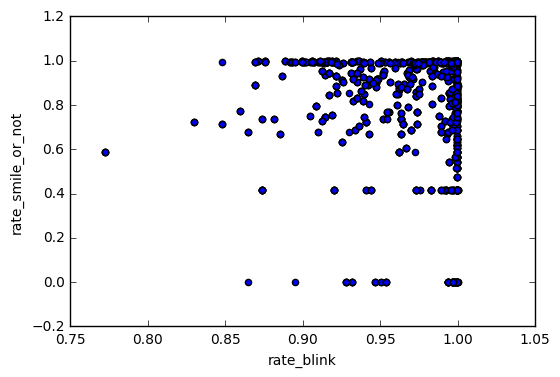

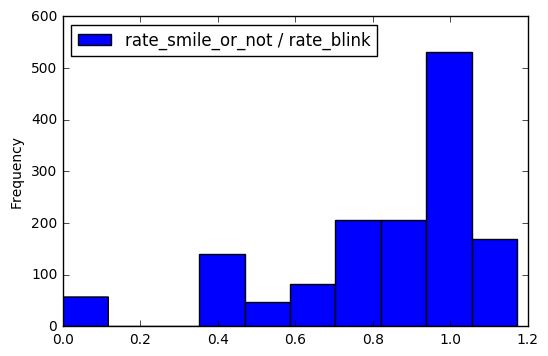

In [67]:
from sklearn import preprocessing

def normalize(df):
    X_normalized = np.power(df['rate_blink'], .07)
    Y_normalized = np.power(df['rate_smile_or_not'], .19)

    pd.DataFrame.from_items([('rate_smile_or_not', Y_normalized.ravel()), ('rate_blink' , X_normalized.ravel())]).plot.scatter(x='rate_blink', y='rate_smile_or_not')

    pd.DataFrame.from_items([('rate_smile_or_not / rate_blink', Y_normalized.ravel() / X_normalized.ravel() )]).plot.hist()
    
normalize(df_happy)

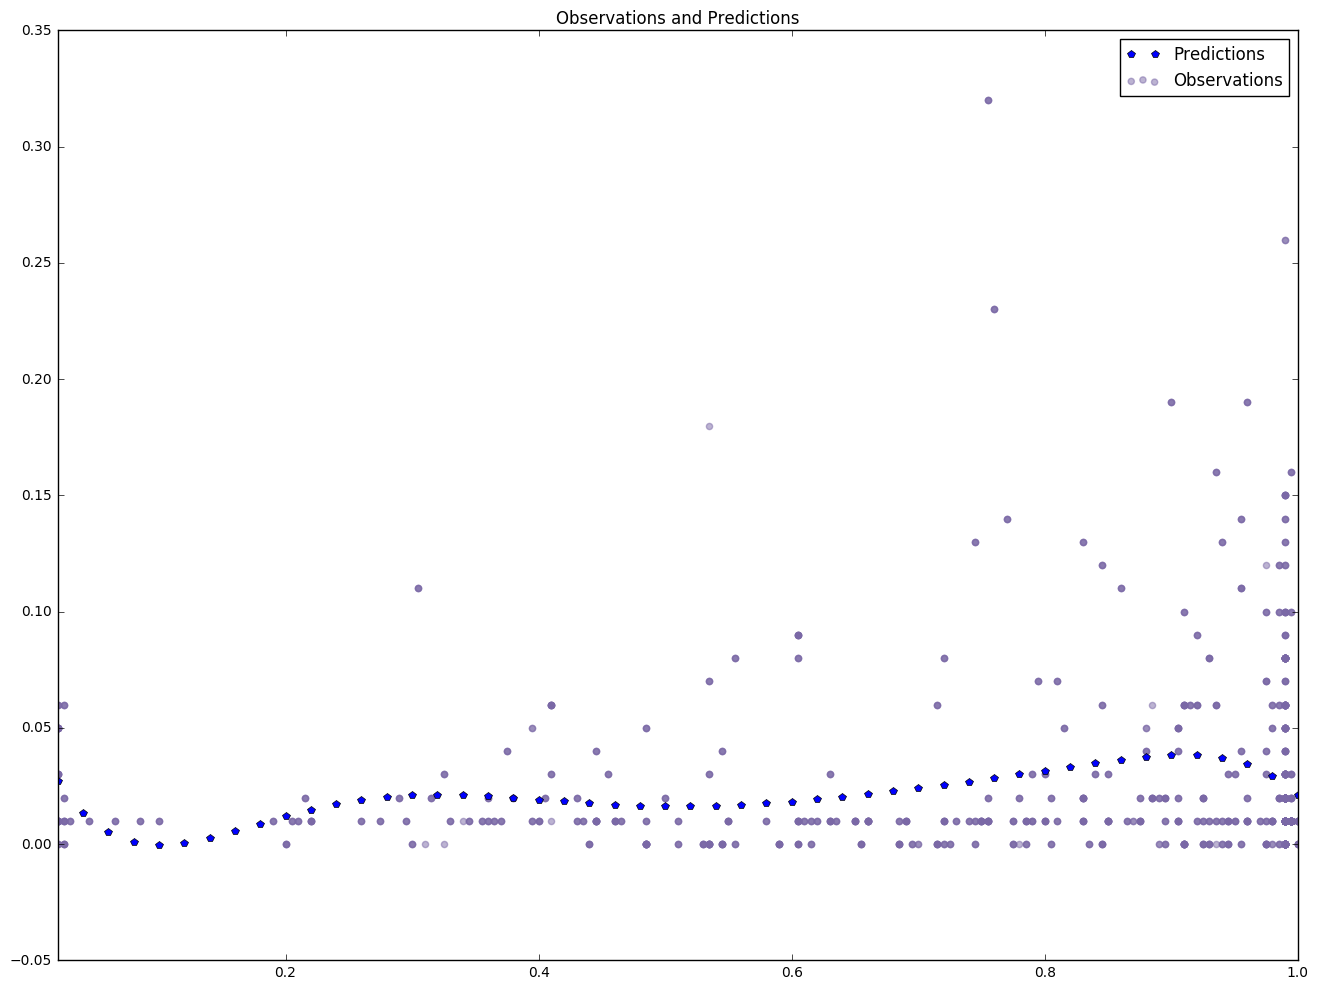

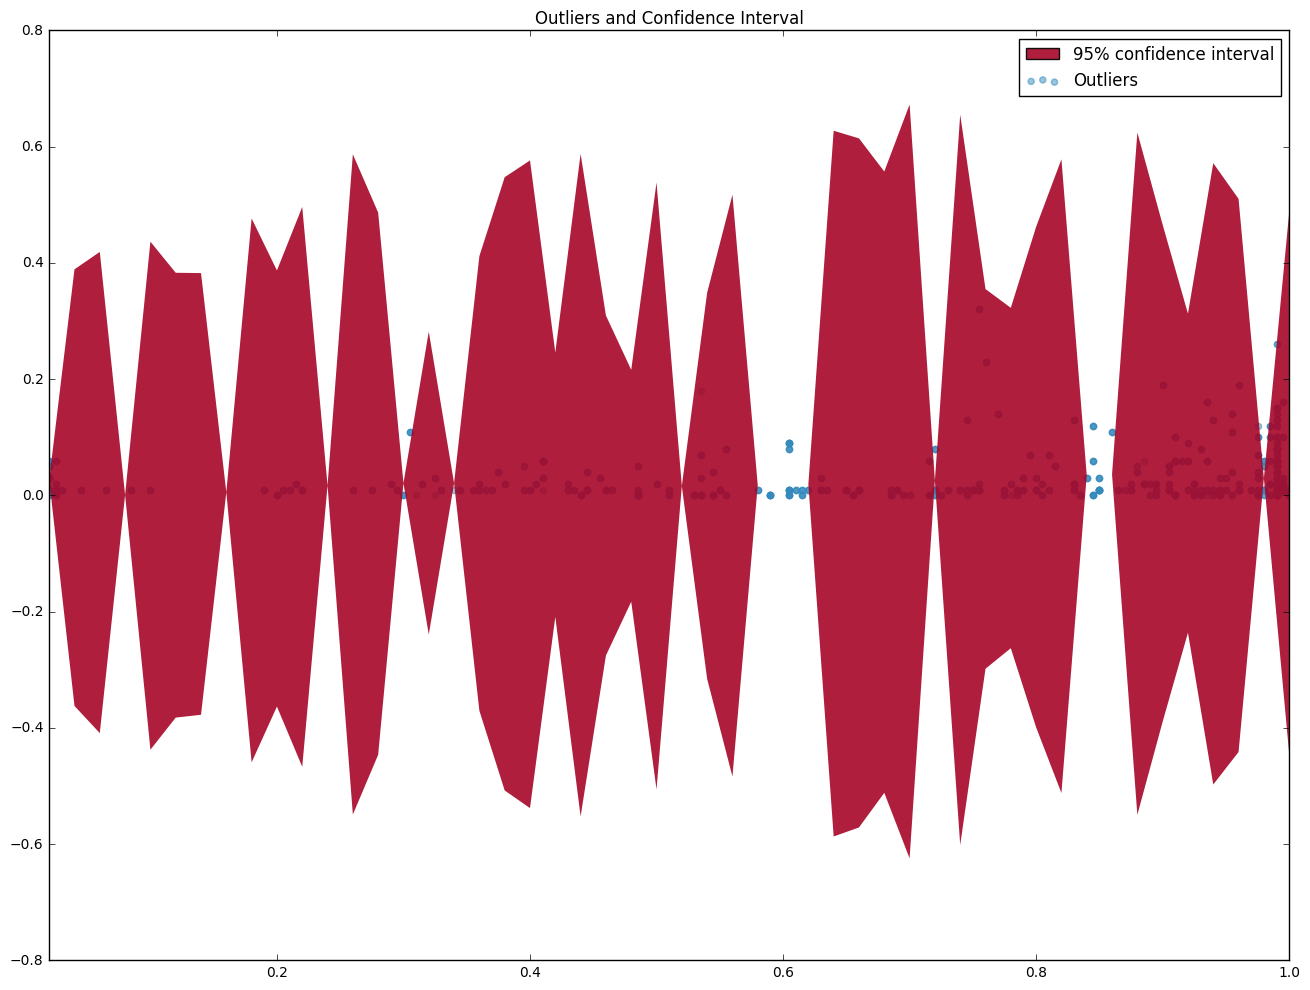

In [70]:
# References
## https://bugra.github.io/work/notes/2014-05-11/robust-regression-and-outlier-detection-via-gaussian-processes/
## https://thecuriousastronomer.wordpress.com/2014/06/26/what-does-a-1-sigma-3-sigma-or-5-sigma-detection-mean/
from sklearn.gaussian_process import GaussianProcessRegressor

def robust_detect_outlier(df):
    
    #df = df.drop_duplicates(subset=['rate_blink','rate_smile_or_not'], keep='last')
    #df = df.drop_duplicates(subset=['rate_smile_or_not'], keep='last')
    
    # display(df)
    
    x = df['rate_blink'].copy()
    y = df['rate_smile_or_not'].copy()
    
    X = np.atleast_2d(x).T
    # y = np.atleast_2d(y).T
    
    x_pred = np.atleast_2d(np.linspace(X.min(), X.max())).T
    gp = GaussianProcessRegressor()
    gp.fit(X, y)
    
    y_pred, mean_squared_error = gp.predict(x_pred, return_std=True)
    sigma = np.sqrt(mean_squared_error)
    confidence_interval =  1.7 * sigma
    
    plt.figure(figsize=(16, 12))
    plt.scatter(X, y, color="#7A68A6", alpha=.5, label='Observations')
    plt.plot(x_pred, y_pred, 'p', label='Predictions')
    plt.title('Observations and Predictions');
    plt.xlim([np.min(x), np.max(x)]);
    plt.legend(loc='upper right');
    
    plt.figure(figsize=(16, 12))
    plt.scatter(x, y, color="#348ABD", alpha=.5, label='Outliers')
    plt.fill(np.concatenate([x_pred, x_pred[::-1]]), np.concatenate([y_pred - confidence_interval, (y_pred + confidence_interval)[::-1]]),
                                            alpha=.9, fc='#A60628', ec='None', label='95% confidence interval')
    plt.title('Outliers and Confidence Interval');
    plt.xlim([np.min(x), np.max(x)]);
    plt.legend(loc='upper right');
    
robust_detect_outlier(df_sad)

## 2. Developing a model

In this second section of the project, we will develop the model to make a prediction, making accurate evaluations of each model's performance.

### Shuffle and split data

We will to implement the following:

- Use train_test_split from sklearn.cross_validation to shuffle and split the features and prices data into training and testing sets.
    - Split the data into 90% training and 10% testing.
    - Set the random_state for train_test_split to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to X_train, X_test, y_train, and y_test.

In [5]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.9, random_state = 0)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Performance Metric

It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement

#### Algorithm OneVsRestClassifier

In [6]:
def model_1(resultados):
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn.svm import LinearSVC
    modelo = OneVsRestClassifier(LinearSVC(random_state = 0))
    resultado = accuracy_score("OneVsRest", modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm OneVsOne

In [7]:
def model_2(resultados):
    from sklearn.multiclass import OneVsOneClassifier
    from sklearn.svm import LinearSVC
    modelo = OneVsOneClassifier(LinearSVC(random_state = 0))
    resultado = accuracy_score("OneVsOne", modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm MultinomialNB

In [8]:
def model_3(resultados):
    from sklearn.naive_bayes import MultinomialNB
    modelo = MultinomialNB()
    resultado = accuracy_score("MultinomialNB", modelo, X_train, y_train)

    resultados[resultado] = modelo 

#### Algorithm AdaBoostClassifier

In [9]:
def model_4(resultados):
    from sklearn.ensemble import AdaBoostClassifier
    modelo = AdaBoostClassifier()
    resultado = accuracy_score("AdaBoostClassifier", modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm LinearSVC

In [10]:
def model_5(resultados):
    from sklearn.svm import LinearSVC
    modelo = LinearSVC(random_state=0)
    resultado = accuracy_score('LinearSVC', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm SVC with Kernel Linear

In [11]:
def model_6(resultados):
    from sklearn.svm import SVC
    modelo = SVC(kernel='linear', C=0.025)
    resultado = accuracy_score('SVC with Kernel Linear', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm DecisionTreeClassifier

In [12]:
def model_7(resultados):
    from sklearn.tree import DecisionTreeClassifier
    modelo = DecisionTreeClassifier(random_state=0)
    resultado = accuracy_score('DecisionTreeClassifier', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorith Extra Trees

In [13]:
def model_8(resultados):
    from sklearn.ensemble import ExtraTreesRegressor
    modelo = ExtraTreesRegressor(n_estimators=10, random_state=0)
    resultado = accuracy_score('ExtraTrees', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm GaussianProcessClassifier

In [14]:
def model_9(resultados):
    from sklearn.gaussian_process import GaussianProcessClassifier
    from sklearn.gaussian_process.kernels import RBF
    modelo = GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True)
    resultado = accuracy_score('GaussianProcessClassifier', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm MLPClassifier

In [15]:
def model_10(resultados):
    from sklearn.neural_network import MLPClassifier
    modelo = MLPClassifier(alpha=1)
    resultado = accuracy_score('MLPClassifier', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm KNeighborsClassifier

In [16]:
def model_11(resultados):
    from sklearn.neighbors import KNeighborsClassifier
    modelo = KNeighborsClassifier(6)
    resultado = accuracy_score('KNeighborsClassifier', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm QuadraticDiscriminantAnalysis

In [17]:
def model_12(resultados):
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
    modelo = QuadraticDiscriminantAnalysis()
    resultado = accuracy_score('QuadraticDiscriminantAnalysis', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm GaussianNB

In [18]:
def model_13(resultados):
    from sklearn.naive_bayes import GaussianNB
    modelo = GaussianNB()
    resultado = accuracy_score('GaussianNB', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm RBF SVM

In [19]:
def model_14(resultados):
    from sklearn.svm import SVC
    modelo = SVC(gamma=2, C=1)
    resultado = accuracy_score('RBF SVM', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Selecting the best algorithm

In [20]:
# Storage result of all algorithm and select the best
resultados = {}

# Create model 1
model_1(resultados)
# Create model 2
model_2(resultados)
# Create model 3
model_3(resultados)
# Create model 4
model_4(resultados)
# Create model 5
model_5(resultados)
# Create model 6
model_6(resultados)
# Create model 7
model_7(resultados)
# Create model 8
model_8(resultados)
# Create model 9
# model_9(resultados)
# Create model 10
model_10(resultados)
# Create model 11
model_11(resultados)
# Create model 12
model_12(resultados)
# Create model 13
model_13(resultados)
# Create model 14
model_14(resultados)


vencedor = performance_metric(resultados, X_train, X_test, y_train, y_test);

Taxa de acerto do OneVsRest: 60.96%
Taxa de acerto do OneVsOne: 61.30%
Taxa de acerto do MultinomialNB: 57.21%
Taxa de acerto do AdaBoostClassifier: 63.28%
Taxa de acerto do LinearSVC: 60.96%
Taxa de acerto do SVC with Kernel Linear: 53.66%
Taxa de acerto do DecisionTreeClassifier: 84.54%
Taxa de acerto do ExtraTrees: 74.71%
Taxa de acerto do MLPClassifier: 59.00%
Taxa de acerto do KNeighborsClassifier: 72.21%
Taxa de acerto do QuadraticDiscriminantAnalysis: 59.81%
Taxa de acerto do GaussianNB: 59.47%
Taxa de acerto do RBF SVM: 62.60%
Taxa de acerto base: 36.77%

Vencedor:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

Taxa de acerto do algoritmo vencedor entre os algoritmos no mundo real : 83.61% 
Total de elementos : 4264


The best algorithm based on their hit:

| Algoritmo  | Taxa de acerto (%) |
|:-:|:-:|
| DecisionTreeClassifier  | 84.54% |
| ExtraTrees  | 74.71% |
| KNeighborsClassifier  | 72.21% |
| AdaBoostClassifier  | 63.28% |
| RBF SVM  | 62.60% |
| OneVsOne  | 61.30% |
| Linear SVC  | 60.96% |
| OneVsRest  | 60.96% |
| QuadraticDiscriminantAnalysis  | 59.81% |
| GaussianNB  | 59.47% |
| MLPClassifier  | 59.34% |
| MultinomialNB  | 57.21% |
| SVC with Kernel Linear  | 53.66% |
| Algoritmo base  | 36.77% |

The winner algorithm with higher acceptance rates for DecisionTreeClassifier, with rate of **84.54%**.

In the real world the algorithm obtained a rate of **83.61%**, close to the support rate during the training. Using the 10% separated during cross-validation.

Other algorithms had had higher result like ExtraTrees, KNeighborsClassifier and AdaBoostClassifier, all them can be analyzed with differents views and could become a good candidate.

## 3. Analysis

In this section, we will analisy the prediction and plot the data and see boundary of prediction.

### Plot decision surface function

We have 3 **features**:
- rate_blink_left
- rate_blink_right
- rate_smile_or_not

The **target** is feelings:
- Sad
- Angry
- Happy

In [21]:
def plot_surface(name, clf, features):
    # Parameters
    plot_colors = "bry"
    plot_step = 0.02
    classifier = ['sad', 'angry', 'happy']
    # feature_names = ['rate_blink_left', 'rate_smile_or_not']

    # Plot the decision boundary
    fig, eixos = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

    for index, feature_name in zip(range(len(features)), features):
        # Train
        clf = clf.fit(X[feature_name], Y)
        
        x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
        y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        # print clf

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = eixos[index].contourf(xx, yy, Z, cmap=plt.cm.Paired)

        eixos[index].set_xlabel(feature_name[0])
        eixos[index].set_ylabel(feature_name[1])

        # Plot the training points
        for i, color in zip(range(len(classifier)), plot_colors):
            idx = np.where(Y == i)
            eixos[index].scatter(X.iloc[idx[0], 0], X.iloc[idx[0], 1], c=color, label=classifier[i],
                        cmap=plt.cm.Paired)

    plt.suptitle("Decision surface from {}".format(name))
    plt.legend()
    plt.show()

### Analysing decision surface 

Based on the result, let us analyze the four best algorithms.

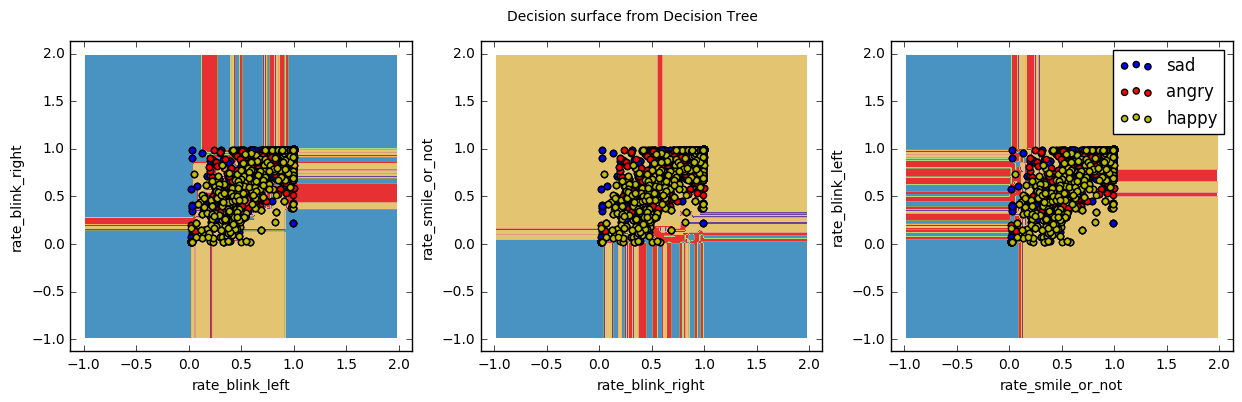

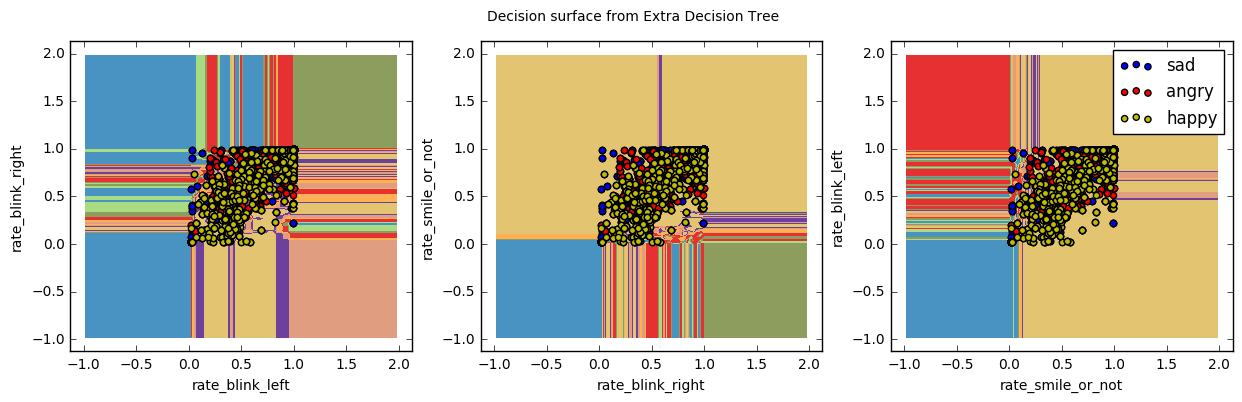

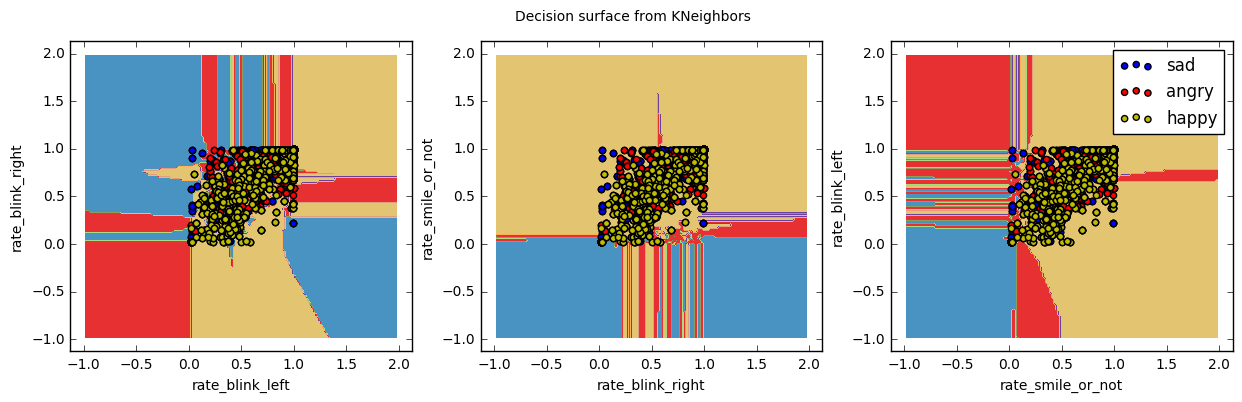

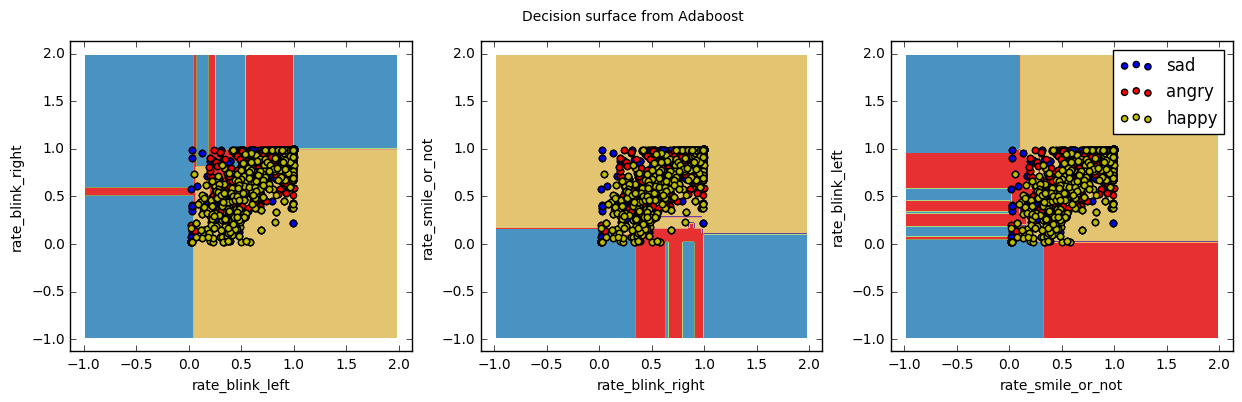

In [22]:
# Decision Tree
plot_surface(name='Decision Tree', clf=vencedor, features=[['rate_blink_left', 'rate_blink_right'], ['rate_blink_right', 'rate_smile_or_not'], ['rate_smile_or_not', 'rate_blink_left']])

# Extra Decision Tree
from sklearn.ensemble import ExtraTreesRegressor
clf = ExtraTreesRegressor(n_estimators=10, random_state=0)
plot_surface(name='Extra Decision Tree', clf=clf, features=[['rate_blink_left', 'rate_blink_right'], ['rate_blink_right', 'rate_smile_or_not'], ['rate_smile_or_not', 'rate_blink_left']])

# KNeighbors
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(3)
plot_surface(name='KNeighbors', clf=clf, features=[['rate_blink_left', 'rate_blink_right'], ['rate_blink_right', 'rate_smile_or_not'], ['rate_smile_or_not', 'rate_blink_left']])

# Adaboost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
plot_surface(name='Adaboost', clf=clf, features=[['rate_blink_left', 'rate_blink_right'], ['rate_blink_right', 'rate_smile_or_not'], ['rate_smile_or_not', 'rate_blink_left']])

Although the **Decision Tree** had been the best algorithm it hadn't had a good generalization. On the other hand, in my opinion the **KNeighborhood** reached a better generalization.

### Learning Cuve

http://scikit-learn.org/stable/modules/learning_curve.html

<module 'matplotlib.pyplot' from 'c:\python27\lib\site-packages\matplotlib\pyplot.pyc'>

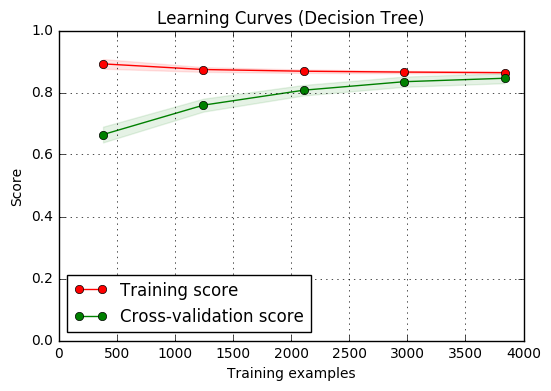

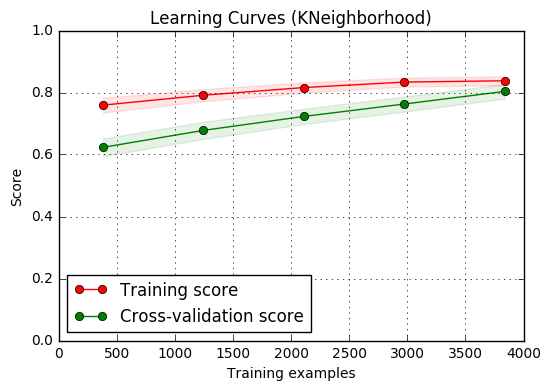

In [23]:
from sklearn.model_selection import ShuffleSplit

title = "Learning Curves (Decision Tree)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 10% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.1, random_state=0)

estimator = vencedor
plot_learning_curve(estimator, title, X, Y, ylim=(0, 1.0), cv=cv, n_jobs=4)

title = "Learning Curves (KNeighborhood)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 10% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.1, random_state=0)

estimator = KNeighborsClassifier(3)
plot_learning_curve(estimator, title, X, Y, ylim=(0, 1.0), cv=cv, n_jobs=4)

### Optimal Model

Finding the optimal model with GridSearchCV

In [24]:
# Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Create the parameters list you wish to tune
# Decision Tree
parameters = { 
              'criterion' : ('entropy', 'gini'),
              'class_weight' : ('balanced', None),
              'min_samples_split' : range(2, 10),
              # 'max_features' : range(1, n_features),
              # 'max_depth' : range(1, 4),
              'random_state' : range(0, 10),
              'presort' : (False, True)
            }

# Initialize the classifier
clf = vencedor

# Make an f1 scoring function using 'make_scorer' 
scorer = make_scorer(f1_score, average='macro')

# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, scorer, cv=10)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

print clf

# Report the final parameters from the optimal model
accuracy_score('vencedor otimizado', clf, X_train, y_train)
real_world(clf, X_train, X_test, y_train, y_test)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')
Taxa de acerto do vencedor otimizado: 84.57%

Taxa de acerto do algoritmo vencedor entre os algoritmos no mundo real : 83.61% 


In relation to the previous result, it obtained a small increase of **0.06%** percentual points. It show us that the algorithm already finds itself in the best performance even trying to optimize the algorithm with GridSearchCV.

| | Before | After |
|--|--|--|
|Training| 84.54% | 84.60% |
|Cross-validation | 83.61% | 83.61% |

### Confusion Matrix

Building confusion matrix from classifier and evalueate the predict

Score médio: 0.84


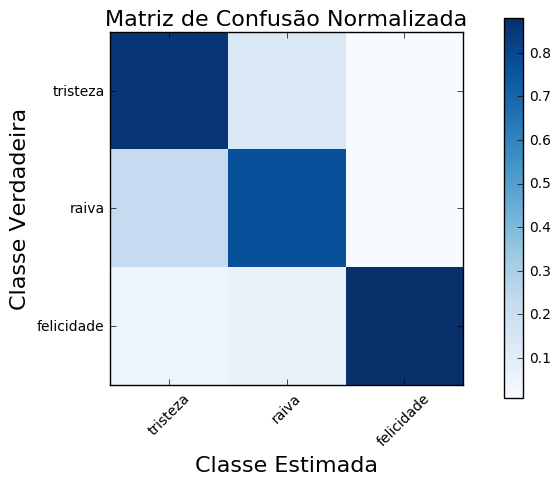

In [25]:
from confusion_matrix import evaluate
from data import get_evaluate

#X_train, y_train, X_test, y_test = get_evaluate()
#print len(X_train), len(y_train), len(X_test), len(y_test)

vencedor = clf

evaluate(X_train, y_train, X_test, y_test, vencedor, ['tristeza', 'raiva', 'felicidade'])

Average score of **84%** with highlight to the feeling of **happiness**, with little indecision between the feelings. But the feelings of sadness and anger still show an indecision between the two feelings

## 4. Making Predictions

Feelings are:

- Sad (0)
- Surprise (1)
- Happy (2)

In [26]:
from collections import Counter

# The best model choiced
modelo = vencedor

features, target, df = get_predict('../server/')
modelo.fit(X, Y)
#display(features)
predict = modelo.predict(features)
result = Counter(predict)
predicted = result.most_common()[0][0]
print result

switcher = {
        0: "Vc parece estar triste! :(",
        1: "Vc parece estar com raiva! :o",
        2: "Vc parece estar feliz! :)"
}
msg = switcher.get(predicted, "Normal")
    
print msg

Counter({0: 78, 1: 71, 2: 52})
Vc parece estar triste! :(
